In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist = MNIST('./data', download=True, transform=transform)
data_loader = DataLoader(mnist, batch_size=100, shuffle=True)

In [35]:
# !pip install nbextension-cellfolding
# !jupyter nbextension install --py cellfolding --user
# !jupyter nbextension enable --py cellfolding --user

In [31]:
!jupyter nbextension enable codefolding/main

Enabling notebook extension codefolding/main...
      - Validating: OK


In [27]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !pip install jupyter_nbextensions_configurator
# !jupyter nbextensions_configurator enable --user

     |████████████████████████████████| 23.5 MB 2.3 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 481 kB 4.0 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.6 MB 3.5 MB/s            
     |████████████████████████████████| 603 kB 5.2 MB/s            


  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428787 sha256=1c729f4f707e914351d6164ab880b69c641b879a2afd316c2fcce5add598c466
  Stored in directory: /home/hticimg/.cache/pip/wheels/bc/30/f6/b11297a115e4266004e1ca9fe4c45bb1530218cec8dc6d6c34
  Created wheel for jupyter-contrib-core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17490 sha256=a87e492673f08f7662e7f94d2a7a1fd2e5941a9dd8ac2233b105d51609b80a5a
  Stored in directory: /home/hticimg/.cache/pip/wheels/32/de/59/bafe20bb2fcdd06d67287ec2e2c69c7522fda9a640fdf01c3c
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.6.1-py2.py3-none-any.whl size=466844 sha256=d44296de452e7763d9e75a751ed3735be91dc2ca569c6be8f3c6e16e498bec00
  Stored in directory: /home/hticimg/.cache/pip/wheels/80/be/b4/d57d7997a2f272d0d6671f590c61ca349d10d968d0cab7d514
Successfully built jupyter-contrib-nbextensions jupyter-contrib

[I 15:19:01 InstallContribNbextensionsApp] Copying: /home/hticimg/gayathri/torchmri/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/toc2/main.css -> /home/hticimg/.local/share/jupyter/nbextensions/toc2/main.css
[I 15:19:01 InstallContribNbextensionsApp] Copying: /home/hticimg/gayathri/torchmri/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/toc2/README.md -> /home/hticimg/.local/share/jupyter/nbextensions/toc2/README.md
[I 15:19:01 InstallContribNbextensionsApp] Copying: /home/hticimg/gayathri/torchmri/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/toc2/demo.gif -> /home/hticimg/.local/share/jupyter/nbextensions/toc2/demo.gif
[I 15:19:01 InstallContribNbextensionsApp] Copying: /home/hticimg/gayathri/torchmri/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/toc2/toc2.js -> /home/hticimg/.local/share/jupyter/nbextensions/toc2/toc2.js
[I 15:19:01 InstallContribNbextensionsApp] Copying: /home/hticimg/ga

Enabling: jupyter_nbextensions_configurator
- Writing config: /home/hticimg/.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.6.1 OK
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...


In [2]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 784)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

In [3]:
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [5]:
# for epoch in range(200):
#     for i, (real_images, _) in enumerate(data_loader):
#         # Train the discriminator
#         d_optimizer.zero_grad()
#         real_images = real_images.view(-1, 784)
#         real_output = discriminator(real_images)
#         real_loss = criterion(real_output, torch.ones(100, 1))
#         real_loss.backward()
#         noise = torch.randn(100, 100)
#         fake_images = generator(noise)
#         fake_output = discriminator(fake_images.detach())
#         fake_loss = criterion(fake_output, torch.zeros(100, 1))
#         fake_loss.backward()
#         d_loss = real_loss + fake_loss
#         d_optimizer.step()
        
#         # Train the generator
#         g_optimizer.zero_grad()
# #         noise = torch.randn(100, 100)
#         fake_images = generator(noise)
#         fake_output = discriminator(fake_images)
#         g_loss = criterion(fake_output, torch.ones(100, 1))
#         g_loss.backward()
#         g_optimizer.step()

#     if (epoch+1) %  1== 0:
#         print("Epoch: {}/200, D Loss: {:.5f}, G Loss: {:.5f}".format(epoch+1, d_loss.item(), g_loss.item()))



Epoch: 1/200, D Loss: 0.11282, G Loss: 8.07387
Epoch: 2/200, D Loss: 0.63616, G Loss: 8.33670
Epoch: 3/200, D Loss: 0.19429, G Loss: 3.80572
Epoch: 4/200, D Loss: 0.58801, G Loss: 4.89964
Epoch: 5/200, D Loss: 0.14570, G Loss: 6.56646
Epoch: 6/200, D Loss: 0.61810, G Loss: 3.27478
Epoch: 7/200, D Loss: 0.30393, G Loss: 4.67634
Epoch: 8/200, D Loss: 0.02357, G Loss: 9.67314
Epoch: 9/200, D Loss: 0.17316, G Loss: 7.92472
Epoch: 10/200, D Loss: 0.09643, G Loss: 7.11612
Epoch: 11/200, D Loss: 0.14866, G Loss: 4.05526
Epoch: 12/200, D Loss: 0.67787, G Loss: 5.60660
Epoch: 13/200, D Loss: 0.23094, G Loss: 7.09391
Epoch: 14/200, D Loss: 0.32696, G Loss: 7.53180
Epoch: 15/200, D Loss: 0.30017, G Loss: 5.35802
Epoch: 16/200, D Loss: 0.24521, G Loss: 4.67665
Epoch: 17/200, D Loss: 0.13500, G Loss: 4.15188
Epoch: 18/200, D Loss: 0.27043, G Loss: 3.97593
Epoch: 19/200, D Loss: 0.19261, G Loss: 5.71177
Epoch: 20/200, D Loss: 0.27532, G Loss: 5.48689
Epoch: 21/200, D Loss: 0.37463, G Loss: 3.55484
E

Epoch: 171/200, D Loss: 0.76818, G Loss: 1.70629
Epoch: 172/200, D Loss: 0.67214, G Loss: 2.00286
Epoch: 173/200, D Loss: 0.75211, G Loss: 1.69993
Epoch: 174/200, D Loss: 0.71132, G Loss: 2.06325
Epoch: 175/200, D Loss: 0.49529, G Loss: 1.93915
Epoch: 176/200, D Loss: 0.60199, G Loss: 1.74878
Epoch: 177/200, D Loss: 0.67645, G Loss: 1.70670
Epoch: 178/200, D Loss: 0.63894, G Loss: 2.09424
Epoch: 179/200, D Loss: 0.70449, G Loss: 2.32496
Epoch: 180/200, D Loss: 0.57582, G Loss: 2.06238
Epoch: 181/200, D Loss: 0.60290, G Loss: 2.42824
Epoch: 182/200, D Loss: 0.64676, G Loss: 1.92858
Epoch: 183/200, D Loss: 0.78311, G Loss: 2.14996
Epoch: 184/200, D Loss: 0.62551, G Loss: 2.06095
Epoch: 185/200, D Loss: 0.98698, G Loss: 2.25007
Epoch: 186/200, D Loss: 0.71974, G Loss: 2.01206
Epoch: 187/200, D Loss: 0.79655, G Loss: 1.96716
Epoch: 188/200, D Loss: 0.54897, G Loss: 2.27895
Epoch: 189/200, D Loss: 0.63642, G Loss: 1.99244
Epoch: 190/200, D Loss: 0.53623, G Loss: 2.01989
Epoch: 191/200, D Lo

Epoch: 1/200, D Loss: 0.07142, G Loss: 8.11689
Epoch: 2/200, D Loss: 0.24433, G Loss: 4.59264
Epoch: 3/200, D Loss: 0.34501, G Loss: 8.98759
Epoch: 4/200, D Loss: 0.23170, G Loss: 7.46548
Epoch: 5/200, D Loss: 0.04974, G Loss: 6.75497
Epoch: 6/200, D Loss: 0.09451, G Loss: 9.20262

In [20]:
def save_model(exp_dir, epoch, model, optimizer):

    out = torch.save(
        {
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'exp_dir':exp_dir
        },
        f='model.pt'
    )

In [21]:
# exp_dir='/home/hticimg/gayathri'
save_model(exp_dir,epoch,generator,g_optimizer)

In [9]:
pwd

'/home/hticimg/gayathri'

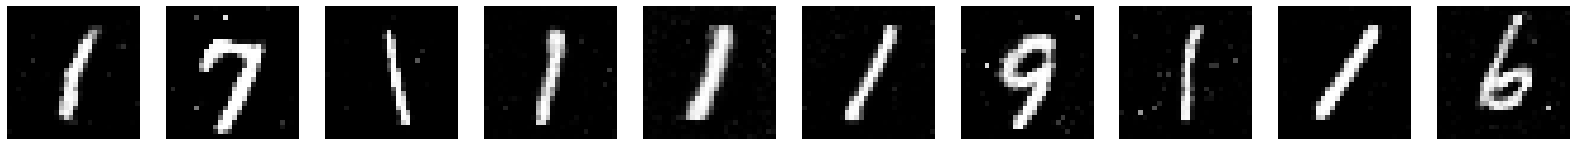

In [7]:
import matplotlib.pyplot as plt

# Generate a batch of fake images
noise = torch.randn(10, 100)
fake_images = generator(noise)
fake_images = fake_images.view(-1, 28, 28)

# Plot the fake images
fig, axes = plt.subplots(1, 10, figsize=(28, 28))
for i, img in enumerate(fake_images):
    axes[i].imshow(img.detach().numpy(), cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:
# import matplotlib as plt 
# # Generate a batch of images
# noise = torch.randn(10,100)

In [22]:
checkpoint_file = '/home/hticimg/gayathri/model.pt'

checkpoint = torch.load(checkpoint_file)
gen = Generator()
gen.load_state_dict(checkpoint['model'])

<All keys matched successfully>

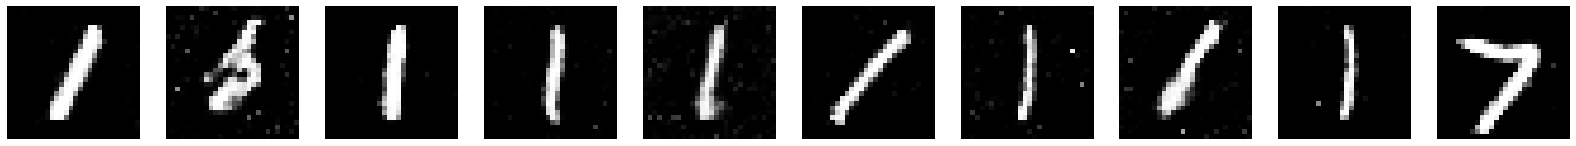

In [26]:
import matplotlib.pyplot as plt

# Generate a batch of fake images
noise = torch.randn(10, 100)
fake_images = gen(noise)
fake_images = fake_images.view(-1, 28, 28)

# Plot the fake images
fig, axes = plt.subplots(1, 10, figsize=(28, 28))
for i, img in enumerate(fake_images):
    axes[i].imshow(img.detach().numpy(), cmap='gray')
    axes[i].axis('off')
plt.show()